In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
data = pd.read_csv("data.csv",engine='python', delimiter=';')

In [176]:
data = data.fillna('Пропустили вопрос').replace({'Высшее, бакалавр или специалист':'Высшее',
                                              'Высшее, магистр':'Высшее',
                                              'Кандидат наук, доктор наук': 'Высшее',
                                              'Два и более высших образований':'Высшее',
                                              'Среднее профессиональное (например, колледж или техникум)': 'Без высшего',
                                              'Неоконченное высшее':'Без высшего',
                                              'Начальное профессиональное (например, профессиональное училище)': 'Без высшего',
                                              'Среднее (полное) общее или ниже': 'Без высшего',
                                              'Затрудняюсь ответить': 'Пропустили вопрос',
                                                'Нет, но есть детская комната, которую он делит с братом/сестрой (братьями, сестрами)':'Нет, делит с братом/сестрой',
                                                'Нет, ребенок живет в одной комнате со взрослыми родственниками': 'Нет, живет со взрослыми'
                                                })

In [177]:
data.head()

,Unnamed: 0,Response.ID,Time.Started,Date.Submitted,Status,IP.Address,Longitude,Latitude,Country,City,...,q85,q86mom_edu,q86dad_edu,q87room,q88auto,q89income,q90month,q90name,q90letter,na_count
0,1,30,30.04.2020 17:29,30.04.2020 17:32,Partial,176.59.103.99,44.0019,56.3283,Russian Federation,Nizhniy Novgorod,...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,306
1,6,41,06.05.2020 15:37,06.05.2020 15:57,Partial,194.58.180.98,40.9344,57.7708,Russian Federation,Kostroma,...,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,Пропустили вопрос,248
2,8,43,06.05.2020 15:46,06.05.2020 16:41,Complete,92.246.164.168,44.9953,53.1947,Russian Federation,Penza,...,Пропустили вопрос,Высшее,Без высшего,"Да, есть своя комната",Да,"На еду и одежду хватает, но покупка телевизора...",10,евг,П,159
3,10,45,06.05.2020 15:47,06.05.2020 16:09,Complete,109.252.122.148,37.6172,55.7527,Russian Federation,Moscow,...,Пропустили вопрос,Высшее,Высшее,"Да, есть своя комната",Да,"На еду и одежду хватает, но покупка телевизора...",10,соф,м,166
4,12,47,06.05.2020 16:17,06.05.2020 16:40,Complete,213.87.156.115,37.6172,55.7527,Russian Federation,Moscow,...,Пропустили вопрос,Высшее,Высшее,"Да, есть своя комната",Да,"На еду и одежду хватает, но покупка телевизора...",5,юли,в,163


In [178]:
def classifier(row):
    if row['q86mom_edu'] == 'Высшее' or row['q86dad_edu'] == 'Высшее':
        return 'Высшее хотя бы у одного родителя'
    elif row['q86mom_edu'] == 'Пропустили вопрос' and row['q86dad_edu'] == 'Пропустили вопрос':
        return 'Пропустили вопрос'
    elif (row['q86mom_edu'] == 'Без высшего' and row['q86dad_edu'] == 'Пропустили вопрос') or (row['q86dad_edu'] == 'Без высшего' and row['q86mom_edu'] == 'Пропустили вопрос'):
        return 'Один без высшего, а один пропустил'
    elif row['q86mom_edu'] == 'Без высшего' and row['q86dad_edu'] == 'Без высшего':
        return 'Оба без высшего'

In [179]:
data['parents_edu'] = data.apply(classifier, axis=1)
edu_dist = {'Уровень образования родителей': data['parents_edu'].value_counts(normalize=True)}
edu_dist_df = pd.DataFrame(edu_dist)
edu_dist_df

,Уровень образования родителей
Высшее хотя бы у одного родителя,0.493779
Пропустили вопрос,0.446734
Оба без высшего,0.048600
"Один без высшего, а один пропустил",0.010886


In [180]:
data['parents_edu'].value_counts()

Высшее хотя бы у одного родителя      1270
Пропустили вопрос                     1149
Оба без высшего                        125
Один без высшего, а один пропустил      28
Name: parents_edu, dtype: int64

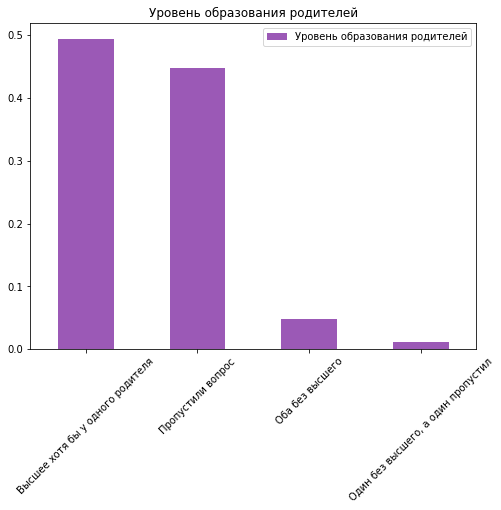

In [181]:
edu_dist_df.plot(kind='bar').set_title('Уровень образования родителей')
plt.xticks(rotation=45)
sns.set_palette('RdBu_r')

Text(0, 0.5, 'Процентное соотношение')

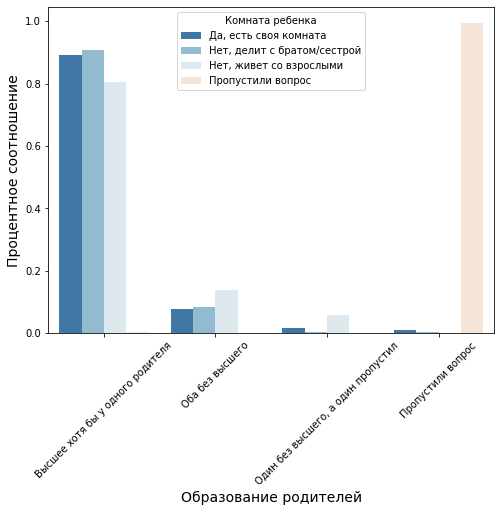

In [182]:
x, y, hue = 'parents_edu', 'prop', 'q87room'


prop_df = (data['parents_edu']
           .groupby(data['q87room'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x='parents_edu',y=y,hue='q87room', data=prop_df).legend(title='Комната ребенка')
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_palette('Blues')
plt.xticks(rotation=45)
plt.xlabel('Образование родителей', fontsize=14)
plt.ylabel('Процентное соотношение', fontsize=14)


In [183]:
data_mom_edu = data.loc[data['q86mom_edu'] != 'Пропустили вопрос']

In [185]:
data_mom_edu.shape

(1416, 359)

In [186]:
data_parents_edu = data.loc[data['parents_edu'] != 'Пропустили вопрос']

In [187]:
data_parents_edu.shape

(1423, 359)

In [188]:
data_parents_edu['parents_edu'].value_counts()

Высшее хотя бы у одного родителя      1270
Оба без высшего                        125
Один без высшего, а один пропустил      28
Name: parents_edu, dtype: int64

In [189]:
data['parents_edu'].value_counts()

Высшее хотя бы у одного родителя      1270
Пропустили вопрос                     1149
Оба без высшего                        125
Один без высшего, а один пропустил      28
Name: parents_edu, dtype: int64

In [190]:
data_mom_edu['q86mom_edu'].value_counts()

Высшее         1187
Без высшего     229
Name: q86mom_edu, dtype: int64

In [193]:
prop_df

,q86mom_edu,q14,prop
0,Без высшего,3 и более часов в день,31.004367
1,Без высшего,Менее 1 часа в день,24.454148
2,Без высшего,Вообще не трачу,23.580786
3,Без высшего,1-2 часа каждый день,20.960699
4,Высшее,3 и более часов в день,27.379949
5,Высшее,Вообще не трачу,26.705981
6,Высшее,Менее 1 часа в день,25.610783
7,Высшее,1-2 часа каждый день,20.303286


Text(0, 0.5, 'Процентное соотношение')

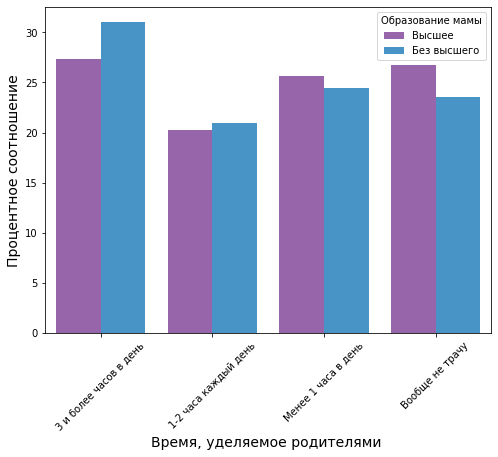

In [194]:
x, y, hue = 'q14', 'prop', 'q86mom_edu'


prop_df = (data_mom_edu['q14']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['prop'] = prop_df['prop']*100

sns.barplot(x='q14',y=y,hue='q86mom_edu', data=prop_df,
            hue_order=['Высшее', 'Без высшего'],
            order=['3 и более часов в день',
                   '1-2 часа каждый день',
                   'Менее 1 часа в день',
                    'Вообще не трачу']).legend(title='Образование мамы')
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_palette(flatui)
plt.xticks(rotation=45)
plt.xlabel('Время, уделяемое родителями ', fontsize=14)
plt.ylabel('Процентное соотношение', fontsize=14)

Text(0, 0.5, 'Процентное соотношение')

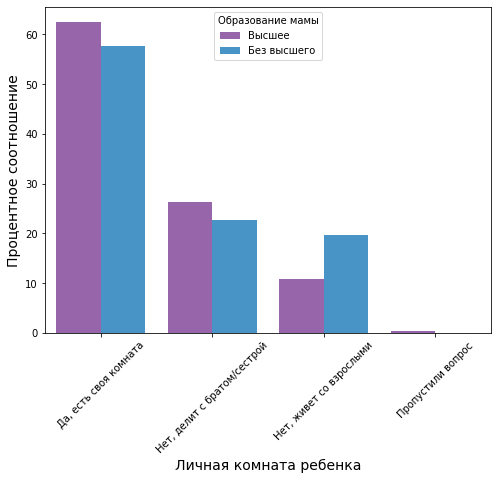

In [195]:
x, y, hue = 'q87room', 'prop', 'q86mom_edu'


prop_df = (data_mom_edu['q87room']
           .groupby(data_mom_edu['q86mom_edu'])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df['prop'] = prop_df['prop']*100

sns.barplot(x='q87room',y=y,hue='q86mom_edu', data=prop_df,
            hue_order=['Высшее', 'Без высшего']).legend(title='Образование мамы')
plt.rcParams['figure.figsize'] = [8, 6]
sns.set_palette(flatui)
plt.xticks(rotation=45)
plt.xlabel('Личная комната ребенка', fontsize=14)
plt.ylabel('Процентное соотношение', fontsize=14)